In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_24646_G')

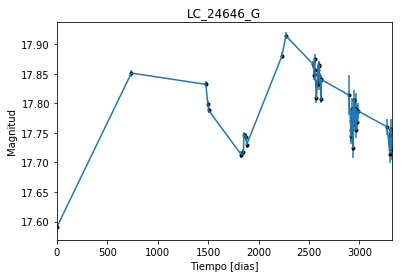

In [2]:
data = np.genfromtxt('LC_24646_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_24646_G')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

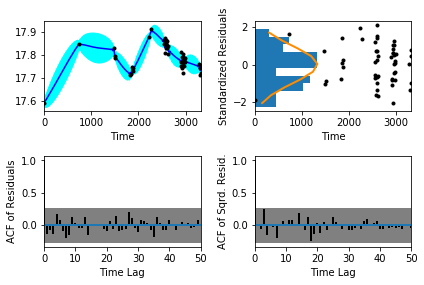

In [5]:
sample.assess_fit()

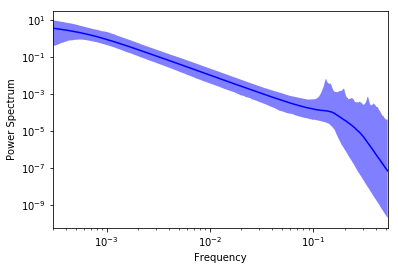

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000376389,0.0137436,'Medida del nivel de ruido')

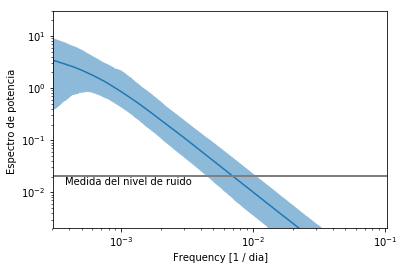

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

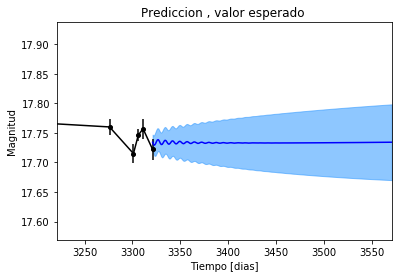

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


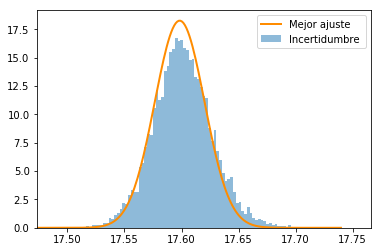

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

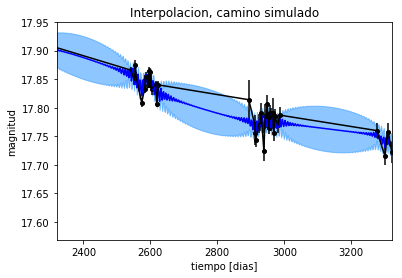

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

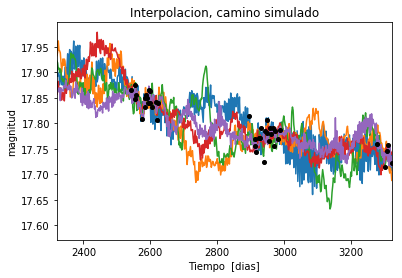

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 89.5017047057
Median: 0.011750196516
Standard deviation: 0.128007152303
68% credibility interval: [ 0.00341367  0.04204748]
95% credibility interval: [ 0.00063837  0.51710047]
99% credibility interval: [  3.66288064e-04   8.69336184e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 2495.35268865
Median: 0.0105530261762
Standard deviation: 0.0746284305892
68% credibility interval: [ 0.00278206  0.03250405]
95% credibility interval: [ 0.00038045  0.2370543 ]
99% credibility interval: [  3.20059585e-04   5.80807128e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 218.941318707
Median: 0.311931600831
Standard deviation: 0.

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 566.222762178
Median: 135.415959646
Standard deviation: 2.1309840655
68% credibility interval: [ 133.05731905  137.03449416]
95% credibility interval: [ 130.07126502  138.29437383]
99% credibility interval: [ 127.90448738  139.9360432 ]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 226.654715761
Median: 2.27413362413
Standard deviation: 2.36962246419
68% credibility interval: [ 0.40589301  5.27351636]
95% credibility interval: [ 0.05478969  8.23536867]
99% credibility interval: [  0.03611396  11.58965866]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 511.47750213
Median: 2.70575271896
Standard deviation: 11.1630245889
68% credibility interval: [  0.98640617  18.22533788]
95% credibility interval: [  0.68327252  

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 63535.2725933
Median: 8.77378703721e-29
Standard deviation: 3.12419629358e+33
68% credibility interval: [  2.55072678e-59   6.22767954e+00]
95% credibility interval: [  9.21605569e-139   1.45475397e+032]
99% credibility interval: [  1.37929344e-141   2.08395750e+034]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1303.57058954
Median: 17.7729899262
Standard deviation: 0.0402775428355
68% credibility interval: [ 17.73076494  17.80616654]
95% credibility interval: [ 17.68357577  17.84237728]
99% credibility interval: [ 17.6517005   17.88762229]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 477.610454426
Median: 0.201645550636
Standard deviation: 0.243144336904
68% credibility interval: [ 0.13580954  0.61972131]
95% credibility interval: [ 0.          0.87434059]
99% credibility interval: [ 0.          1.00089479]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 477.610454426
Median: 0.201645550636
Standard deviation: 0.243144336904
68% credibility interval: [ 0.13580954  0.61972131]
95% credibility interval: [ 0.          0.87434059]
99% credibility interval: [ 0.          1.00089479]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 123.527144198
Median: 0.0
Standard deviation: 0.000180899214871
68% cred

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 566.222762178
Median: 135.415959646
Standard deviation: 2.1309840655
68% credibility interval: [ 133.05731905  137.03449416]
95% credibility interval: [ 130.07126502  138.29437383]
99% credibility interval: [ 127.90448738  139.9360432 ]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 398.3983319
Median: 0.00717020712306
Standard deviation: 0.00356994743576
68% credibility interval: [ 0.00475317  0.01068193]
95% credibility interval: [ 0.00345151  0.01729502]
99% credibility interval: [ 0.00286791  0.02193396]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1081.05431423
Median: 1.05153540311
Standard deviation: 0.220946911038
68% credibility interval: [ 0.86951621  1.28766732]
95% credibility interval: [ 0.73373615  1.59459515]
99% credibility interval: [ 0.66018768  1.80631603]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 929.295713725
Median: 0.0216251268867
Standard deviation: 0.227339608489
68% credibility interval: [ 0.000678    0.21318565]
95% credibility interval: [  1.79402253e-34   8.33671988e-01]
99% credibility interval: [  6.50724118e-37   1.34585152e+00]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 89.5017047057
Median: (-0.073828662106-5.49364392064j)
Standard deviation: 1.72650453396
68% credibility interval: [-0.26419210-1.67212614j -0.02144869-1.18627398j]
95% credibility interval: [-3.24903807+0.j         -0.00401100-1.13423128j]
99% credibility interval: [ -5.46220034e+00+0.j          -2.30145578e-03-0.00272551j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 2495.35268865
Median: (-0.0663066190164+1.52512813779j)
Standard deviation: 1.59806208543
68% credibility interval: [-0.20422897+2.84899984j -0.01748019+0.86542341j]
95% credibility interval: [-1.48945611+1.48124626j -0.00239044+0.j        ]
99% credibility interval: [ -3.64931881e+00+3.33502352j  -2.01099368e-03+0.j        ]
Posterior summary for par